# Hierarchical clustering

         ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  Cluster  
0       10.379783        86.990970   2.963135           0       10  
1       15.180013        56.329076   4.500656           0       31  
2       16.868637        66.420093   3.055934           0       20  
3       18.436525       100.341674   4.628771           0       18  
4       11.558279        31.997993   4.075075           0       29  


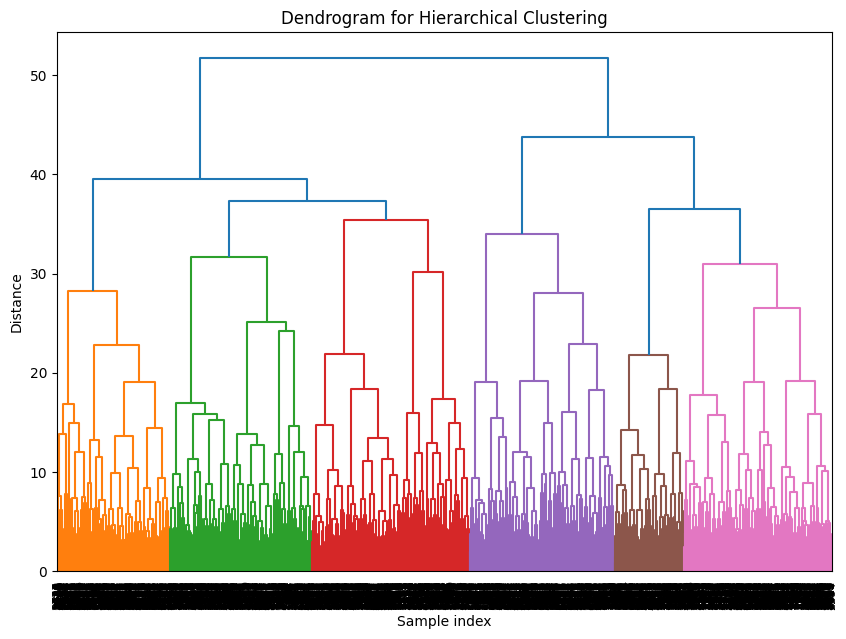

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
df = pd.read_csv('water_potability_preprocessed.csv')
df_features = df.drop('Potability', axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
Z = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
max_d = 15 
clusters = fcluster(Z, max_d, criterion='distance') 
df['Cluster'] = clusters
print(df.head())


# K-Means clustering

Cluster centroids:
 [[-0.47687194 -0.09588711 -0.12761219  0.17448901 -0.1830895  -0.06887452
  -0.47687332 -0.3149446   0.75891369  1.25703084]
 [-0.17873171  0.010131    1.52642607 -0.12059299 -0.67423996  0.08968298
   0.07797451  0.20320197 -0.08314088  0.5797608 ]
 [ 0.5492585   0.14912903 -0.38158758  0.17555336  0.11218938  1.07474275
  -0.03223648  0.36735634 -0.2422552  -0.2500277 ]
 [-0.12271307 -0.362995   -0.22717555 -0.02802717  0.77224693 -0.48544502
  -0.44837322  0.04301817 -0.57406999 -1.21277409]
 [ 0.25592301  0.28655523 -0.35845206 -0.23375975 -0.13305353 -0.4996292
   0.88178671 -0.16204975 -0.03095183 -0.43618225]]


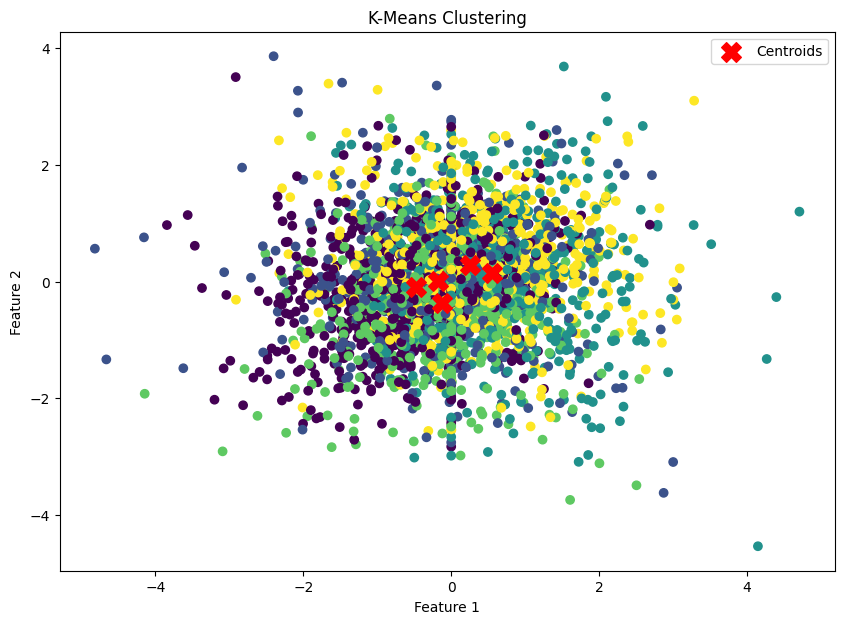

In [6]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Exclude the 'Potability' column (or any target variable you have)
df_features = df.drop('Potability', axis=1)

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Specify the number of clusters (e.g., k=3)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model and predict cluster labels
df['Cluster'] = kmeans.fit_predict(df_scaled)

# View the cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster centroids:\n", centroids)

# Visualize the clusters (use the first two principal components or features for simplicity)
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



# Cluster evaluation

In [7]:
# Import necessary libraries
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate the clustering
# Silhouette Score: measures how close points in the same cluster are and how far they are from other clusters
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])

# Inertia: Sum of squared distances of samples to their closest cluster center
inertia = kmeans.inertia_

# Davies-Bouldin Score: a lower score means better clusters
davies_bouldin = davies_bouldin_score(df_scaled, df['Cluster'])

# Calinski-Harabasz Index: a higher score means better clusters
calinski_harabasz = calinski_harabasz_score(df_scaled, df['Cluster'])

# Print the evaluation results
print(f'Silhouette Score: {silhouette_avg:.4f}')
print(f'Inertia (Sum of Squared Distances): {inertia:.4f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz:.4f}')


Silhouette Score: 0.0889
Inertia (Sum of Squared Distances): 24657.2045
Davies-Bouldin Index: 2.5176
Calinski-Harabasz Index: 268.7316
